# Visualisations
## Price vs Living Area

In [14]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [15]:

def remove_outliers_iqr(df, columns):
    """
    Remove outliers from specified columns in a DataFrame using the IQR (Interquartile Range) method.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame
        columns (list): List of column names to apply outlier removal on
        
    Returns:
        pd.DataFrame: A DataFrame with outliers removed
    """
    
    df_clean = df.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        
    return df_clean

Pearson r = 0.5928
R² = 0.3514


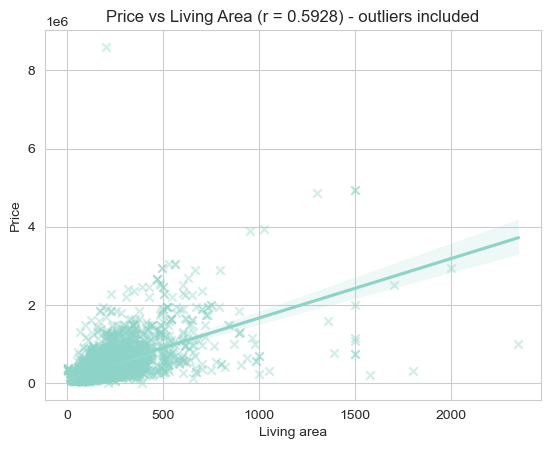

Pearson r = 0.5150
R² = 0.2652


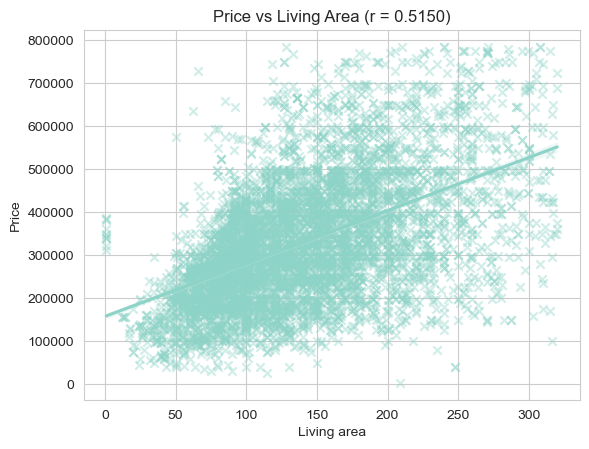

In [16]:
def create_price_vs_living_area_plot_without_outliers():
    df = pd.read_csv('../../clean_data.csv')
    df_clean = df.dropna(subset=['Price', 'Living area'])

    # Remove outliers for Price and Living area
    df_no_outliers = remove_outliers_iqr(df_clean, ['Price', 'Living area'])

    r, p = stats.pearsonr(df_no_outliers['Price'], df_no_outliers['Living area'])
    print(f"Pearson r = {r:.4f}")
    print(f"R² = {r**2:.4f}")


    sns.regplot(x='Living area', y='Price', data=df_no_outliers, marker="x",scatter_kws={'alpha':0.4})
    plt.title(f'Price vs Living Area (r = {r:.4f})')
    plt.show()

def create_price_vs_living_area_plot():
    df = pd.read_csv('../../clean_data.csv')
    df_clean = df.dropna(subset=['Price', 'Living area'])

    r, p = stats.pearsonr(df_clean['Price'], df_clean['Living area'])
    print(f"Pearson r = {r:.4f}")
    print(f"R² = {r**2:.4f}")

    sns.regplot(x='Living area', y='Price', data=df_clean, marker="x",scatter_kws={'alpha':0.4})
    plt.title(f'Price vs Living Area (r = {r:.4f}) - outliers included')
    plt.show()
create_price_vs_living_area_plot()
create_price_vs_living_area_plot_without_outliers()

## r Pearson
Result:
A Pearson correlation coefficient of 1 shows a perfect positive correlation, while -1 indicates a perfect negative correlation.

How strongly two variables are related and in which direction
So pearson r = 0.5928, so it is a positive correlation



## R2

R² = 0.64 → "Living area is responsible for 64% of why houses have different prices"
R² = 0.30 → "Living area only explains 30%... other factors matter more!"
R² = 0.90 → "Living area explains almost everything! Very predictive!"

0 = explains nothing (useless)
0.5 = explains half the story
1 = explains everything (perfect)





TODO: should I group by postal code or locality name / or do both...

Steps I did:

- some localities have less than 10 houses
- mean vs median vs mode

Mean
**Pros:**
- Easy to understand
- Uses all data points

**Cons:**
- **Sensitive to outliers!** One €2 million mansion in a cheap area will skew the mean way up

Median
**Pros:**
- **Not affected by outliers**
- Shows the "middle" house price
- More representative of typical prices

**Cons:**
- Doesn't account for extreme values

Mode ← Bad for prices
Because prices are continuous




Pearson r = 0.4612
R² = 0.2127 (21.3%)


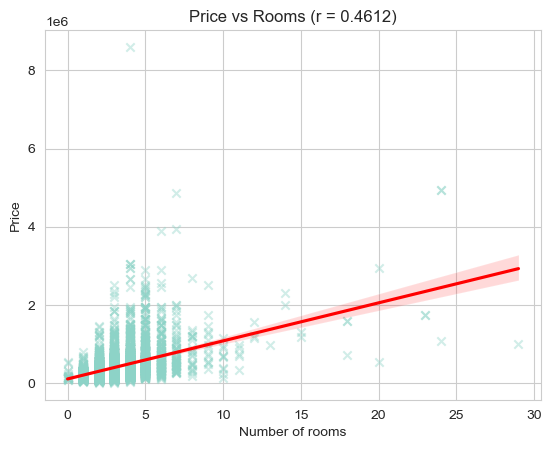

Pearson r = 0.3840
R² = 0.1475 (14.7%)


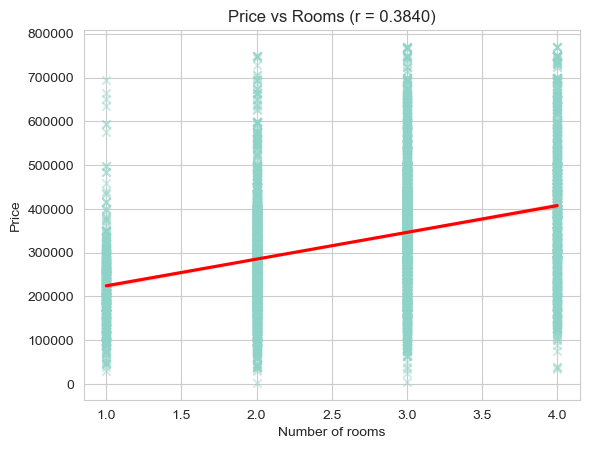

Pearson r = 0.3840
R² = 0.1475 (14.7%)


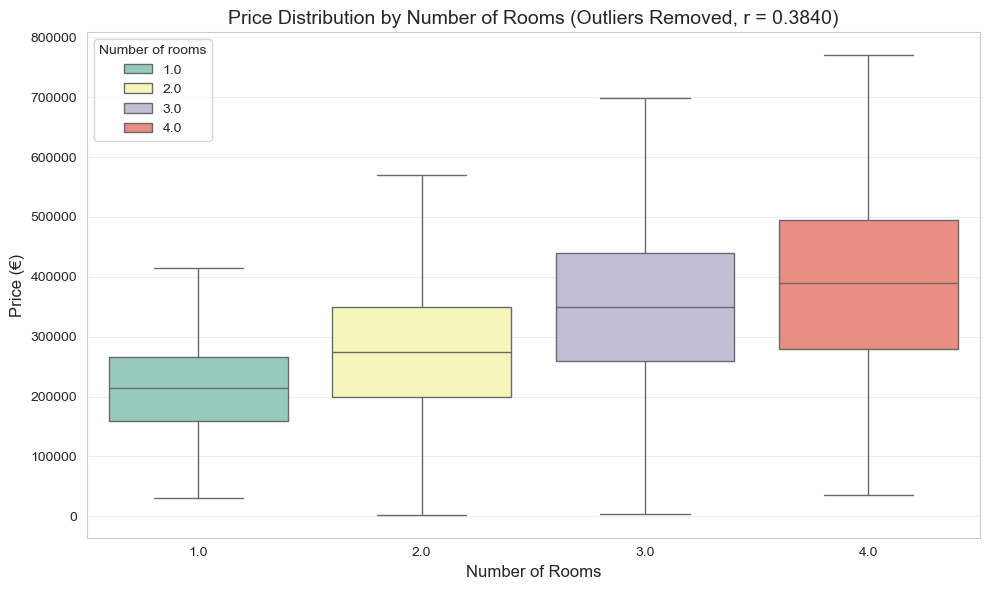

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def create_price_vs_rooms_plot():
    df = pd.read_csv('../../clean_data.csv')
    df_clean = df.dropna(subset=['Price', 'Number of rooms'])

    r, p = stats.pearsonr(df_clean['Price'], df_clean['Number of rooms'])
    print(f"Pearson r = {r:.4f}")
    print(f"R² = {r**2:.4f} ({r**2*100:.1f}%)")

    sns.regplot(x='Number of rooms', y='Price', data=df_clean,
                scatter_kws={'alpha':0.4}, line_kws={'color':'red'},marker="x")
    plt.title(f'Price vs Rooms (r = {r:.4f})')
   
    plt.savefig(f'visualisations/rooms_price_analysis.png', 
            dpi=300, bbox_inches='tight')
    plt.show()

def create_price_vs_rooms_plot_removed_outliers():
    df = pd.read_csv('../../clean_data.csv')
    df_clean = df.dropna(subset=['Price', 'Number of rooms'])

    df_no_outliers = remove_outliers_iqr(df_clean, ['Price', 'Number of rooms']).copy()

    r, p = stats.pearsonr(df_no_outliers['Price'], df_no_outliers['Number of rooms'])
    print(f"Pearson r = {r:.4f}")
    print(f"R² = {r**2:.4f} ({r**2*100:.1f}%)")
    sns.regplot(x='Number of rooms', y='Price', data=df_no_outliers, 
                scatter_kws={'alpha':0.4}, line_kws={'color':'red'}, marker="x")
    plt.title(f'Price vs Rooms (r = {r:.4f})')
    plt.savefig(f'visualisations/rooms_price_removed_outliers_analysis.png', 
        dpi=300, bbox_inches='tight')
    plt.show()

    
def create_price_vs_rooms_plot_removed_outliers_boxplot():
    df = pd.read_csv('../../clean_data.csv')
    df_clean = df.dropna(subset=['Price', 'Number of rooms'])

    df_no_outliers = remove_outliers_iqr(df_clean, ['Price', 'Number of rooms']).copy()

    r, p = stats.pearsonr(df_no_outliers['Price'], df_no_outliers['Number of rooms'])
    print(f"Pearson r = {r:.4f}")
    print(f"R² = {r**2:.4f} ({r**2*100:.1f}%)")

    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='Number of rooms',
        y='Price',
        hue='Number of rooms',
        data=df_no_outliers,
        palette='Set3',
        showfliers=False   # recommended since you removed outliers
    )

    plt.xlabel("Number of Rooms", fontsize=12)
    plt.ylabel("Price (€)", fontsize=12)
    plt.title(f"Price Distribution by Number of Rooms (Outliers Removed, r = {r:.4f})", fontsize=14)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('visualisations/rooms_price_boxplot_analysis.png', 
        dpi=300, bbox_inches='tight')
    plt.show()



create_price_vs_rooms_plot()
create_price_vs_rooms_plot_removed_outliers()
create_price_vs_rooms_plot_removed_outliers_boxplot()


# Location vs price per square meter

In [18]:
def calculate_price_per_m2_column(self) -> None:
        """
        Calculate the price per m2 of the living area
        """
        if "Price per m2" in self.df.columns:
           print("Column 'Price per m2' already exists.")
        else:
           self.df["Price per m2"] = self.df["Price"] / self.df["Living area"]
           print("Added column 'Price per m2'.")

Property ID             object
Locality name           object
Postal code              int64
Price                    int64
Type of property        object
Subtype of property     object
Number of rooms        float64
Living area            float64
Equipped kitchen         int64
Furnished                int64
Open fire                int64
Terrace                  int64
Garden                   int64
Number of facades      float64
Swimming pool            int64
State of building       object
Garden Surface         float64
Terrace Surface        float64
Price per m2           float64
dtype: object
Index(['Property ID', 'Locality name', 'Postal code', 'Price',
       'Type of property', 'Subtype of property', 'Number of rooms',
       'Living area', 'Equipped kitchen', 'Furnished', 'Open fire', 'Terrace',
       'Garden', 'Number of facades', 'Swimming pool', 'State of building',
       'Garden Surface', 'Terrace Surface', 'Price per m2'],
      dtype='object')
['Price', 'Number of rooms'

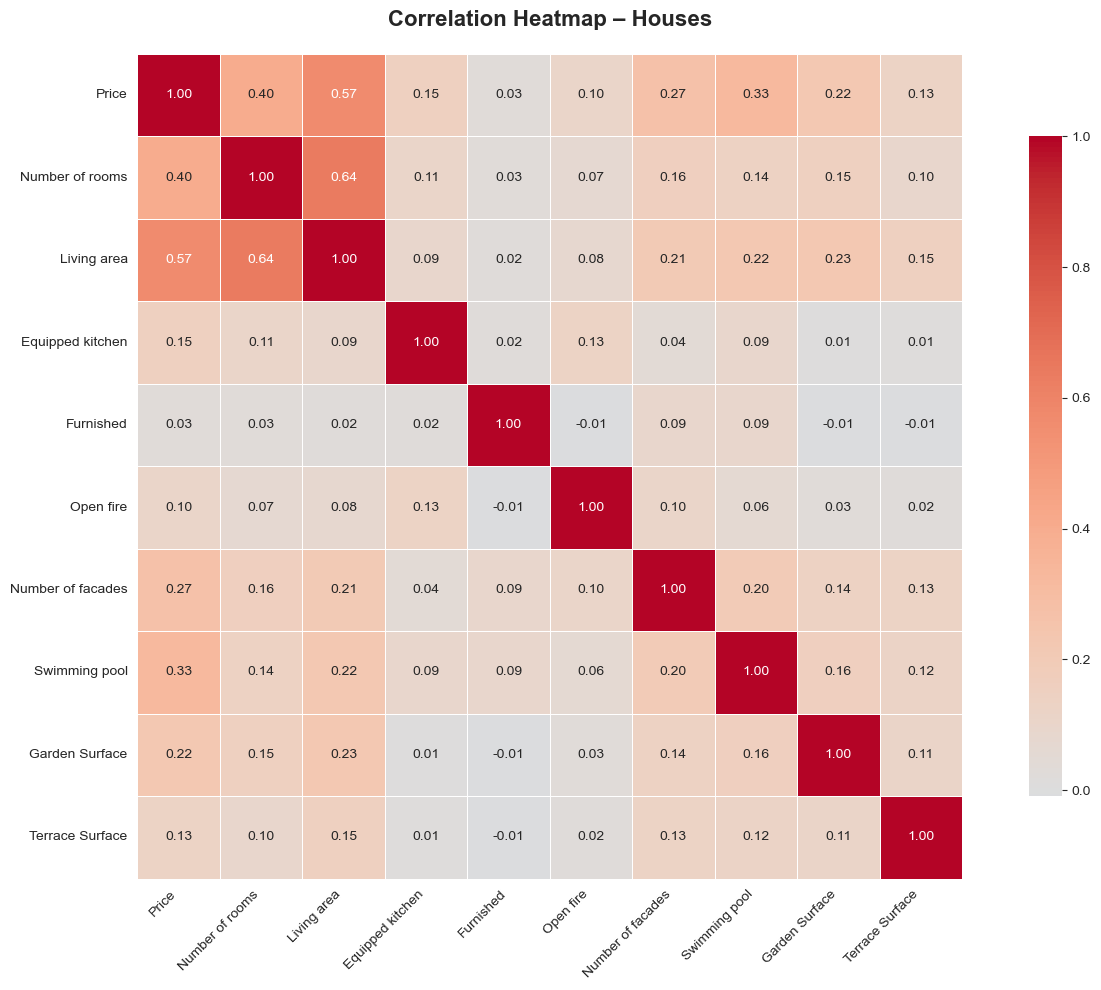

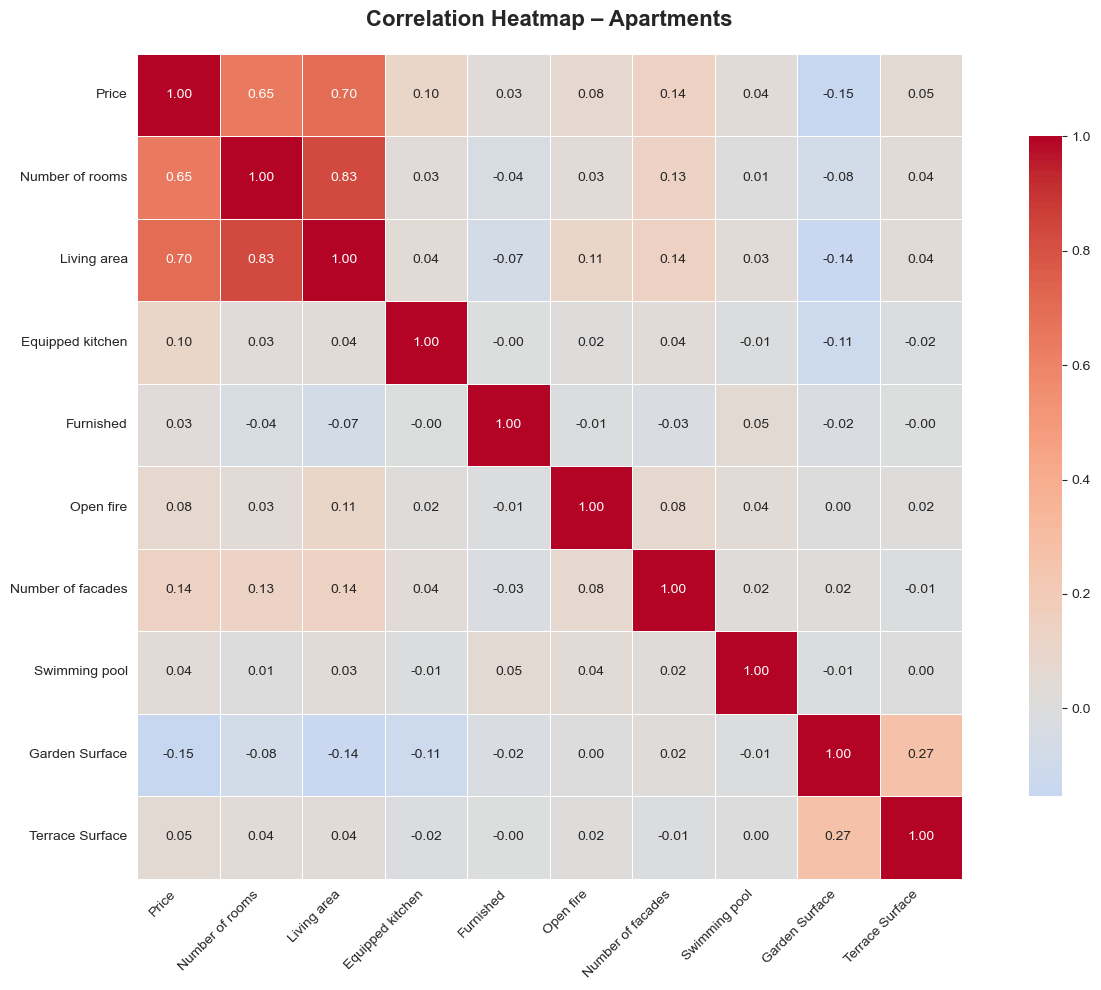

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



def create_all_heatmaps():
    # Load dataset
    df = pd.read_csv('../../clean_data_0.csv')

    print(df.dtypes)

    print(df.columns)

    removed_cols = df.drop(columns=['Price per m2','Terrace','Garden','Postal code','Property ID'])

    numeric_cols = removed_cols.select_dtypes(include=[np.number]).columns.tolist()
    print(numeric_cols)

    # Subset into houses and apartments
    houses = df[df["Type of property"] == "House"].copy()
    appartments = df[df["Type of property"].isin(["Appartment", "Apartment"])].copy()

    print(f"\nEntries - Houses: {len(houses)}, Appartments: {len(appartments)}")

    corr_houses = houses[numeric_cols].corr()
    corr_apartments = appartments[numeric_cols].corr()



    def create_heatmap(corr_matrix, title: str):  
        plt.figure(figsize=(14, 10))
        sns.heatmap(
            corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8}
        )
        plt.title(f'Correlation Heatmap – {title}', fontsize=16, fontweight='bold', pad=20)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()

        filename = f'visualisations/correlation_heatmap_{title.lower()}.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')

        plt.show()
    create_heatmap(corr_houses, "Houses")
    create_heatmap(corr_apartments, "Apartments")

create_all_heatmaps()



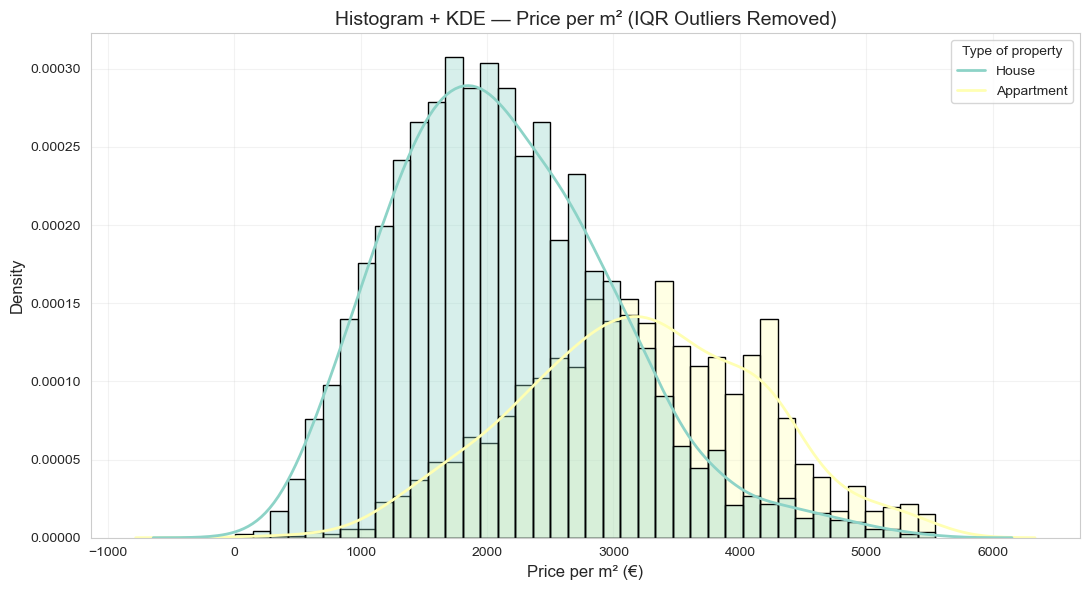

<Figure size 640x480 with 0 Axes>

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../../clean_data_0.csv')

df = df[['Type of property', 'Price per m2']].dropna()

df_property_types = df['Type of property'].isin(['House', 'Appartment']).copy()

cleaned_df = df[df_property_types]

df_iqr = remove_outliers_iqr(cleaned_df, ['Price per m2'])

plt.figure(figsize=(11, 6))

sns.histplot(
    data=df_iqr,
    x='Price per m2',
    hue='Type of property',
    bins=40,
    stat='density',
    alpha=0.35,
    edgecolor='black'
)

sns.kdeplot(
    data=df_iqr,
    x='Price per m2',
    hue='Type of property',
    linewidth=2,
    fill=False,
    bw_adjust=1.3
)

plt.xlabel("Price per m² (€)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Histogram + KDE — Price per m² (IQR Outliers Removed)", fontsize=14)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

plt.savefig('visualisations/histogram_kde_price_per_m2_analysis.png', 
            dpi=300, bbox_inches='tight')


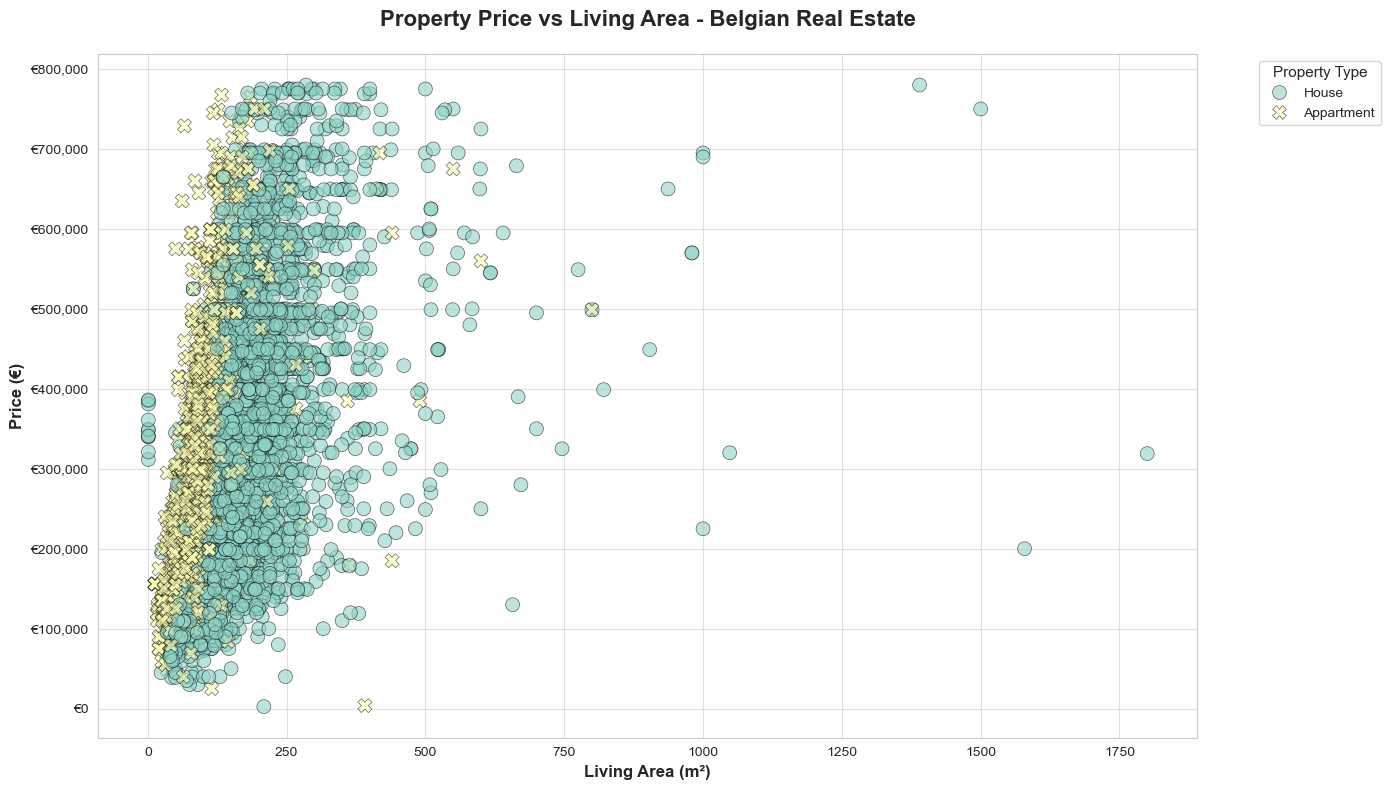

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_style("whitegrid")
sns.set_palette("Set3")


df = pd.read_csv('../../clean_data_0.csv')
df_clean = df.dropna(subset=['Price', 'Living area'])
df_iqr = remove_outliers_iqr(df_clean, ['Price'])
property_types = df_iqr['Type of property'].unique()


fig, ax = plt.subplots(figsize=(14, 8))


sns.scatterplot(
    data=df_iqr,
    x='Living area',
    y='Price',
    hue='Type of property',
    style='Type of property',
    s=100,
    alpha=0.6,
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)

# Formatting
ax.set_xlabel('Living Area (m²)', fontsize=12, fontweight='bold')
ax.set_ylabel('Price (€)', fontsize=12, fontweight='bold')
ax.set_title('Property Price vs Living Area - Belgian Real Estate', 
             fontsize=16, fontweight='bold', pad=20)

# Format y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x:,.0f}'))

# Legend
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left', 
           title_fontsize=11, fontsize=10)

# Grid
ax.grid(True, alpha=0.6)

plt.tight_layout()
plt.savefig('visualisations/seaborn_property_analysis.png', 
            dpi=300, bbox_inches='tight')


plt.show()

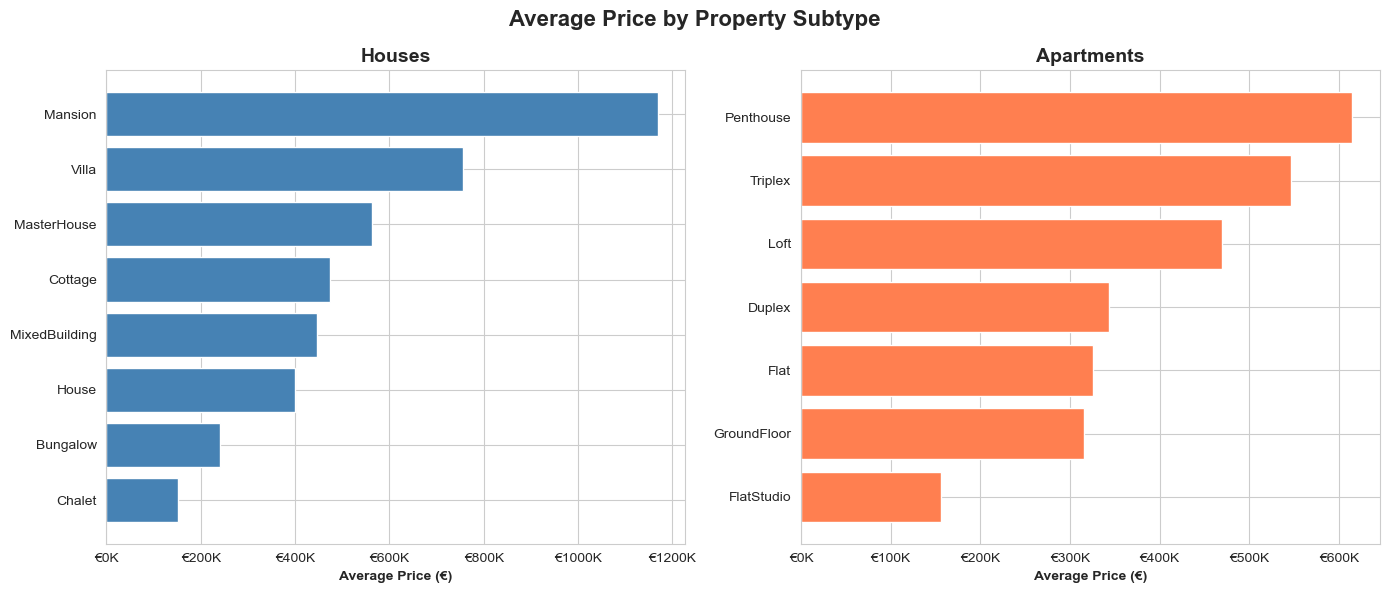

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")
sns.set_palette("Set3")


df = pd.read_csv('../../clean_data_0.csv')
df_clean = df.dropna(subset=['Price', 'Type of property', 'Subtype of property'])


avg_prices = df_clean.groupby(['Type of property', 'Subtype of property'])['Price'].mean().reset_index()
avg_prices.columns = ['Type of property', 'Subtype of property', 'Average Price']


houses = avg_prices[avg_prices['Type of property'] == 'House'].sort_values('Average Price', ascending=True)
apartments = avg_prices[avg_prices['Type of property'] == 'Appartment'].sort_values('Average Price', ascending=True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Houses
ax1.barh(houses['Subtype of property'], houses['Average Price'], color='steelblue')
ax1.set_xlabel('Average Price (€)', fontweight='bold')
ax1.set_title('Houses', fontsize=14, fontweight='bold')
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1000:.0f}K'))

# Apartments
ax2.barh(apartments['Subtype of property'], apartments['Average Price'], color='coral')
ax2.set_xlabel('Average Price (€)', fontweight='bold')
ax2.set_title('Apartments', fontsize=14, fontweight='bold')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1000:.0f}K'))

fig.suptitle('Average Price by Property Subtype', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('visualisations/avg_price_by_type_subtype.png', dpi=300, bbox_inches='tight')
plt.show()